## Analyze A/B Test Results

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents

- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)



#### Part I - Probability

To get started, let's import our libraries.

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [2]:
df=pd.read_csv('ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   user_id       294478 non-null  int64 
 1   timestamp     294478 non-null  object
 2   group         294478 non-null  object
 3   landing_page  294478 non-null  object
 4   converted     294478 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


b. Use the below cell to find the number of rows in the dataset.

In [4]:
print("The number of rows in the dataset is: ",df.shape[0])

The number of rows in the dataset is:  294478


c. The number of unique users in the dataset.

In [5]:
print('The number of unique users in the dataset',df.user_id.nunique())

The number of unique users in the dataset 290584


d. The proportion of users converted.

In [6]:
#convert the converted column type to into int 
df['converted']=df['converted'].astype(str).astype(int)

In [7]:
user_converted=df.query('converted==1')
num_user_conv=len(user_converted)
print('The number of users who converted is: ',num_user_conv)
user_size=df['user_id'].size
print('The number of users size is: ',user_size)
P_conv=num_user_conv/user_size
print('The proportion of users converted is', P_conv)

The number of users who converted is:  35237
The number of users size is:  294478
The proportion of users converted is 0.11965919355605512


e. The number of times the `new_page` and `treatment` don't line up.

In [8]:
num_T_old=df.query('landing_page == "old_page" and group == "treatment"')
print('The number of times the old_page and treatment match :',len(num_T_old))

The number of times the old_page and treatment match : 1965


In [9]:
num_C_new=df.query('landing_page == "new_page" and group == "control"')
print('The number of times the new_page and control match :',len(num_C_new))

The number of times the new_page and control match : 1928


In [10]:
Result_Tnot_new=num_T_old+num_C_new
print('The number of times the new_page and treatment dont line up is :',len(Result_Tnot_new))

The number of times the new_page and treatment dont line up is : 3893


f. Do any of the rows have missing values?

In [11]:
df.isnull().sum()

user_id         0
timestamp       0
group           0
landing_page    0
converted       0
dtype: int64

`2.` For the rows where **treatment** is not aligned with **new_page** or **control** is not aligned with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to provide how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [12]:
#The answer is remove those rows
df_newT=df.query('landing_page == "new_page" and group == "treatment"')
df_oldC=df.query('landing_page == "old_page" and group == "control"')
#Append them as one dataset
df2 = df_newT.append(df_oldC, ignore_index=True)
#check the result
df2.head()

,user_id,timestamp,group,landing_page,converted
0,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
1,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
2,679687,2017-01-19 03:26:46.940749,treatment,new_page,1
3,817355,2017-01-04 17:58:08.979471,treatment,new_page,1
4,839785,2017-01-15 18:11:06.610965,treatment,new_page,1


In [13]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [14]:
print('The number of unique users in the df2: ',df2.user_id.nunique())

The number of unique users in the df2:  290584


b. There is one **user_id** repeated in **df2**.  What is it?

In [15]:
user_id_Dup=df2[df2.user_id.duplicated()]
user_id_Dup.head()

,user_id,timestamp,group,landing_page,converted
1404,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


c. What is the row information for the repeat **user_id**? 

In [16]:
df2.iloc[1404]

user_id                             773192
timestamp       2017-01-14 02:55:59.590927
group                            treatment
landing_page                      new_page
converted                                0
Name: 1404, dtype: object

d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [17]:
#Drop the row duplicate
df2 = df2.drop(1404)
df2 = df2.reset_index(drop=True)
#Check the result
df2.iloc[1404]

user_id                             884145
timestamp       2017-01-09 15:45:38.457508
group                            treatment
landing_page                      new_page
converted                                0
Name: 1404, dtype: object

`4.` Use **df2** in the below cells to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [18]:
#Number of individual converting:
Num_conv=len(df2.query('converted==1'))
print("The probability of an individual converting regardless of the page they receive is: ",Num_conv/df2.user_id.size)

The probability of an individual converting regardless of the page they receive is:  0.11959708724499628


b. Given that an individual was in the `control` group, what is the probability they converted?

In [19]:
#Number of an individual was in the control group and converted:
Num_c_conv=len(df2.query('group=="control" and converted==1'))
#Number of an individual was in the control group:
All_c = len(df2.query('group=="control"'))
print("Probability of an individual was in the control group and converted",Num_c_conv/All_c)

Probability of an individual was in the control group and converted 0.1203863045004612


c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [20]:
#Number of an individual was in the treatment group and converted:
Num_t_conv=len(df2.query('group=="treatment" and converted==1'))
#Number of an individual was in the treatment group:
All_t = len(df2.query('group=="treatment"'))
print("Probability of an individual was in the treatment group and converted",Num_t_conv/All_t)

Probability of an individual was in the treatment group and converted 0.11880806551510564


d. What is the probability that an individual received the new page?

In [21]:
#Number of an individual received the new page
user_rec_new=len(df2.query('landing_page=="new_page"'))
print("The probability that an individual received the new page is: ",user_rec_new/df2.user_id.size)

The probability that an individual received the new page is:  0.5000619442226688


e. Consider your results from a. through d. above, and explain below whether you think there is sufficient evidence to say that the new treatment page leads to more conversions.

**The results show the probability of conversion for the treatment group is less than that for the control group 
(0.1188<0.1203).Therefore, it shows that there is not sufficient evidence to say that the treatment page leads 
to more conversions.**

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

#### H0: **$p_{new}$** ≤ **$p_{old}$**

#### H1: **$p_{new}$**  >  **$p_{old}$** 

or 

#### H0: **$p_{new}$** -  **$p_{old}$** ≤ 0

#### H1: **$p_{new}$**  -  **$p_{old}$** > 0

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **convert rate** for $p_{new}$ under the null? 

In [22]:
P_New=(df2['converted']==1).mean()
print('The convert rate for pnew under the null is: ',P_New)

The convert rate for pnew under the null is:  0.11959708724499628


b. What is the **convert rate** for $p_{old}$ under the null? <br><br>

In [23]:
P_Old=(df2['converted']==1).mean()
print('The convert rate for pold under the null is: ',P_Old)

The convert rate for pold under the null is:  0.11959708724499628


c. What is $n_{new}$?

In [24]:
#The number of individuals in the treatment group
N_New =len(df2.query('group =="treatment" '))
print("The number of individuals in the treatment group is: ",N_New)

The number of individuals in the treatment group is:  145310


d. What is $n_{old}$?

In [25]:
#The number of individuals in the control group
N_Old =len(df2.query('group =="control" '))
print("The number of individuals in the control group is: ",N_Old)

The number of individuals in the control group is:  145274


e. Simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [26]:
new_page_converted = np.random.choice([0, 1], size= N_New, p = [P_New, 1-P_New])
len1=len(new_page_converted)
print("The length of new_page_converted",len1)


The length of new_page_converted 145310


f. Simulate $n_{old}$ transactions with a convert rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [27]:
old_page_converted = np.random.choice([0, 1], size= N_Old, p = [P_Old, 1-P_Old])
len2=len(old_page_converted)
print("The length of old_page_converted",len2)

The length of old_page_converted 145274


g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [28]:
difs= new_page_converted.mean() - old_page_converted.mean()
print("The differents betwen P_Old and P_New is: ",difs)

The differents betwen P_Old and P_New is:  9.843558210653747e-05


h. Simulate 10,000 $p_{new}$ - $p_{old}$ values using this same process similarly to the one you calculated in parts **a. through g.** above.  Store all 10,000 values in a numpy array called **p_diffs**.

In [29]:
p_diffs = []
for p in range(10000):
    new_page_converted = np.random.choice([1,0], size=N_New, p=[P_New, 1-P_New])
    old_page_converted = np.random.choice([1,0], size=N_Old, p=[P_Old, 1-P_Old])
    p_diffs.append(new_page_converted.mean() - old_page_converted.mean())
    

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

Text(0, 0.5, 'Frequency')

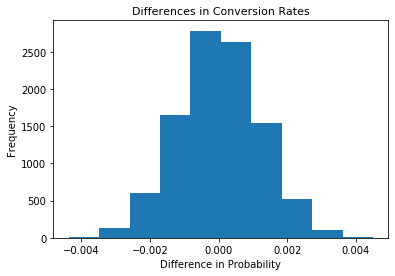

In [30]:
plt.hist(p_diffs);
plt.title("Differences in Conversion Rates", fontsize=11)
plt.xlabel("Difference in Probability", fontsize=10)
plt.ylabel('Frequency', fontsize=10)

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [31]:
# Calculating P-value
New_page_converted = df2.query('converted == 1 and landing_page == "new_page"').count()[0]
Old_page_converted = df2.query('converted == 1 and landing_page == "old_page"').count()[0]

Actual_Diffs = (New_page_converted/N_New) - (Old_page_converted/N_Old)
Null_vals = np.random.normal(0,np.std(p_diffs),10000)
(Null_vals > Actual_Diffs).mean()

0.9062

k. In words, explain what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

### By calulated P-value is around 0.9042 which is greater than type 1 error where the $\alpha$ 0.05 so, we fail to reject the null hypothesis, the old page shows a slightly better value than the new page.

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [32]:
import statsmodels.api as sm

convert_old = len(df2.query('group == "control" and converted == 1')["converted"])
convert_new = len(df2.query('group == "treatment" and converted == 1')["converted"])
n_old = df2.query('landing_page== "old_page"').shape[0]
n_new = df2.query('landing_page== "new_page"').shape[0]

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [33]:
z_score, p_value = sm.stats.proportions_ztest([convert_new, convert_old], [n_new, n_old], alternative='larger')
print('Z_score : ',z_score)
print('P_value : ',p_value)

Z_score :  -1.3109241984234394
P_value :  0.9050583127590245


In [34]:
from scipy.stats import norm
print("The significant z-score is: ",norm.cdf(z_score))
print("The critical value at 95% confidence is: ",norm.ppf(1-(0.05)))

The significant z-score is:  0.09494168724097551
The critical value at 95% confidence is:  1.6448536269514722


n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

### Since the Z-score value is -1.31 and it's less than critical value at 95% confidence which is around 1.644 ,So we fail to reject the null hypothesis. The P-value is around 0.905 which is greater than 0.05 with confidence with 95% so we also fail to reject the null hypothesis using the p-value.

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you acheived in the previous A/B test can also be acheived by performing regression.<br><br>

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

#### Logistic Regression

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives.  However, you first need to create a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [35]:
#Adding intercept 
df2['intercept'] = 1

#Adding dummy variable
df2['ab_page'] = pd.get_dummies(df2['group'])['treatment']

df2.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page
0,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1
1,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1
2,679687,2017-01-19 03:26:46.940749,treatment,new_page,1,1,1
3,817355,2017-01-04 17:58:08.979471,treatment,new_page,1,1,1
4,839785,2017-01-15 18:11:06.610965,treatment,new_page,1,1,1


c. Use **statsmodels** to import your regression model.  Instantiate the model, and fit the model using the two columns you created in part **b.** to predict whether or not an individual converts.

In [36]:
import statsmodels.api as sm
model_page=sm.Logit(df2['converted'],df2[['intercept','ab_page']])
results=model_page.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [37]:
print (results.summary())

                           Logit Regression Results                           
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Fri, 19 Jun 2020   Pseudo R-squ.:               8.077e-06
Time:                        13:51:36   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1899
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.311      0.190      -0.037       0.007


e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in the **Part II**?

**The P-value associated with the ab_page is 0.190 ,while in part II was around 0.905. In this part, the P-value is higher than 0.05 which means we reject the null hypothesis. The null and alternative hypotheses in this part are to check in the null hypothesis if the old page has a conversion rates the same as the new page while in part II was about if the old page has higher or equal conversion rates than the new page.**

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

Considering other factors is a good idea to make sure to determine the relative influence of one or more predictor variables to the criterion value such as timestamp. Disadvantages of the multiple linear regression model according to the lessons may causes:

-Non-linearity of the response-predictor relationships

-Correlation of error terms

-Non-constant Variance and Normally Distributed Errors

-Outliers/ High leverage points

-Multicollinearity

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives. You will need to read in the **countries.csv** dataset and merge together your datasets on the approporiate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [38]:
df3 = pd.read_csv('countries.csv')
df3.head() 

,user_id,country
0,834778,UK
1,928468,US
2,822059,UK
3,711597,UK
4,710616,UK


In [39]:
df2 = df3.set_index('user_id').join(df2.set_index('user_id'), how='inner')
df2.head()

,country,timestamp,group,landing_page,converted,intercept,ab_page
user_id,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1


In [40]:
# To know the countries that we have in the dataset 
Country_Type = df2['country'].str.get_dummies()
Country_Type

,CA,UK,US
user_id,,,
834778,0,1,0
928468,0,0,1
822059,0,1,0
711597,0,1,0
710616,0,1,0
...,...,...,...
653118,0,0,1
878226,0,1,0
799368,0,1,0


In [41]:
df2[['CA','UK','US']] = pd.get_dummies(df2['country'])
df2['intercept'] = 1
logit = sm.Logit(df2['converted'], df2[['intercept','CA','US']])
result = logit.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.366116
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290581
Method:                           MLE   Df Model:                            2
Date:                Fri, 19 Jun 2020   Pseudo R-squ.:               1.521e-05
Time:                        13:51:41   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1984
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9868      0.011   -174.174      0.000      -2.009      -1.964
CA            -0.0507      0.028     -1.786      0.074      -0.106       0.005
US            -0.0099      0.013     -0.746      0.456      -0.036       0.016
==============================================================================
"""

In [42]:
np.exp(-0.0507),np.exp(-0.0099)

(0.9505637969004034, 0.9901488436829572)

In [43]:
1/np.exp(-0.0507),1/np.exp(-0.0099)

(1.052007243765014, 1.009949167117542)

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [45]:
### Fit Your Linear Model And Obtain the Results
df2['ab_page_CA'] = df2['ab_page']* df2['CA']
df2['ab_page_US'] = df2['ab_page']* df2['US']

logit = sm.Logit(df2['converted'], df2[['intercept','ab_page','ab_page_CA','ab_page_US','CA','US']])
result = logit.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.366109
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290578
Method:                           MLE   Df Model:                            5
Date:                Fri, 19 Jun 2020   Pseudo R-squ.:               3.482e-05
Time:                        14:04:29   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1920
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9922      0.016   -123.457      0.000      -2.024      -1.961
ab_page        0.0108      0.023      0.475      0.635      -0.034       0.056
ab_page_CA    -0.0783      0.057     -1.378      0.168      -0.190       0.033
ab_page_US    -0.0314      0.027     -1.181      0.238      -0.084       0.021
CA            -0.0118      0.040     -0.296      0.767      -0.090       0.066
US             0.0057      0.019      0.306      0.760      -0.031       0.043
==============================================================================
"""

The P-values for CA and the US and even the interaction are greater than 0.05. We fail to reject the null hypothesis which means it's significant.


<a id='conclusions'></a>
## Conclusions

Congratulations on completing the project! 

### Gather Submission Materials

Once you are satisfied with the status of your Notebook, you should save it in a format that will make it easy for others to read. You can use the __File -> Download as -> HTML (.html)__ menu to save your notebook as an .html file. If you are working locally and get an error about "No module name", then open a terminal and try installing the missing module using `pip install <module_name>` (don't include the "<" or ">" or any words following a period in the module name).

You will submit both your original Notebook and an HTML or PDF copy of the Notebook for review. There is no need for you to include any data files with your submission. If you made reference to other websites, books, and other resources to help you in solving tasks in the project, make sure that you document them. It is recommended that you either add a "Resources" section in a Markdown cell at the end of the Notebook report, or you can include a `readme.txt` file documenting your sources.

### Submit the Project

When you're ready, click on the "Submit Project" button to go to the project submission page. You can submit your files as a .zip archive or you can link to a GitHub repository containing your project files. If you go with GitHub, note that your submission will be a snapshot of the linked repository at time of submission. It is recommended that you keep each project in a separate repository to avoid any potential confusion: if a reviewer gets multiple folders representing multiple projects, there might be confusion regarding what project is to be evaluated.

It can take us up to a week to grade the project, but in most cases it is much faster. You will get an email once your submission has been reviewed. If you are having any problems submitting your project or wish to check on the status of your submission, please email us at dataanalyst-project@udacity.com. In the meantime, you should feel free to continue on with your learning journey by beginning the next module in the program.